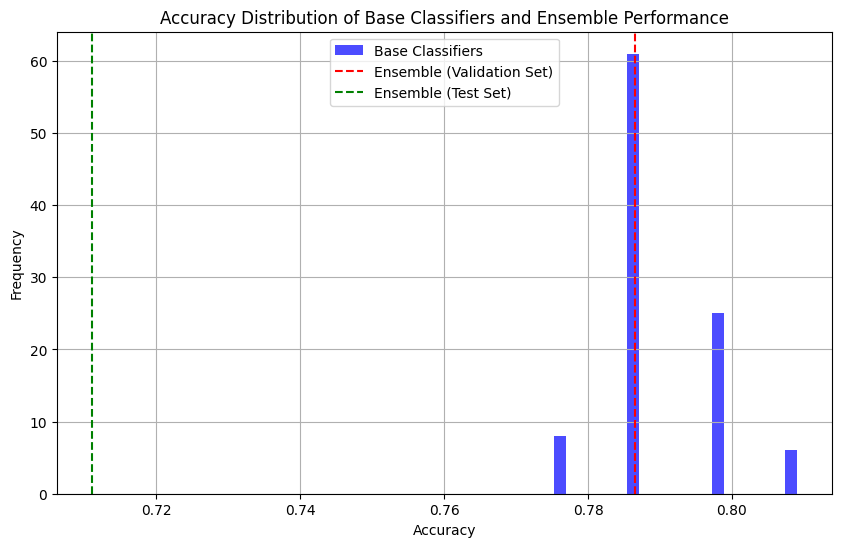

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import xgboost as xgb

data = pd.read_csv("Q5.csv")

X = data.drop(columns=["Survived"])
y = data["Survived"]
random_state = 123123

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_state
)

base_models = []
for i in range(100):
    clf = DecisionTreeClassifier(random_state=i)
    clf.fit(X_train, y_train)
    base_models.append(clf)

base_accuracies = []
for clf in base_models:
    y_val_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    base_accuracies.append(accuracy)

ensemble_predictions = np.array([clf.predict(X_val) for clf in base_models])
ensemble_predictions = np.mean(ensemble_predictions, axis=0) > 0.5

ensemble_accuracy_val = accuracy_score(y_val, ensemble_predictions)

ensemble_predictions_test = np.array([clf.predict(X_test) for clf in base_models])
ensemble_predictions_test = np.mean(ensemble_predictions_test, axis=0) > 0.5
ensemble_accuracy_test = accuracy_score(y_test, ensemble_predictions_test)

plt.figure(figsize=(10, 6))
plt.hist(base_accuracies, bins=20, alpha=0.7, color="blue", label="Base Classifiers")
plt.axvline(
    x=ensemble_accuracy_val,
    color="red",
    linestyle="--",
    label="Ensemble (Validation Set)",
)
plt.axvline(
    x=ensemble_accuracy_test, color="green", linestyle="--", label="Ensemble (Test Set)"
)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Accuracy Distribution of Base Classifiers and Ensemble Performance")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
max_depth_values = [None, 3, 5, 7]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 5]
max_features_values = [None, "sqrt", "log2"]

results = []

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            for max_features in max_features_values:
                base_models = []

                for i in range(100):
                    clf = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        random_state=i,
                    )
                    clf.fit(X_train, y_train)
                    base_models.append(clf)

                ensemble_predictions = np.array(
                    [clf.predict(X_val) for clf in base_models]
                )
                ensemble_predictions = np.mean(ensemble_predictions, axis=0) > 0.5

                ensemble_accuracy_val = accuracy_score(y_val, ensemble_predictions)

                ensemble_predictions_test = np.array(
                    [clf.predict(X_test) for clf in base_models]
                )
                ensemble_predictions_test = (
                    np.mean(ensemble_predictions_test, axis=0) > 0.5
                )
                ensemble_accuracy_test = accuracy_score(
                    y_test, ensemble_predictions_test
                )

                results.append(
                    {
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf,
                        "max_features": max_features,
                        "ensemble_accuracy_val": ensemble_accuracy_val,
                        "ensemble_accuracy_test": ensemble_accuracy_test,
                    }
                )

for result in results:
    print(
        f"Max Depth: {result['max_depth']}, "
        f"Min Samples Split: {result['min_samples_split']}, "
        f"Min Samples Leaf: {result['min_samples_leaf']}, "
        f"Max Features: {result['max_features']}, "
        f"Validation Accuracy: {result['ensemble_accuracy_val']:.4f}, "
        f"Test Accuracy: {result['ensemble_accuracy_test']:.4f}"
    )

sorted_results = sorted(
    results, key=lambda x: x["ensemble_accuracy_test"], reverse=True
)

for idx, result in enumerate(sorted_results):
    print(
        f"{idx + 1}. Max Depth: {result['max_depth']}, "
        f"Min Samples Split: {result['min_samples_split']}, "
        f"Min Samples Leaf: {result['min_samples_leaf']}, "
        f"Max Features: {result['max_features']}, "
        f"Validation Accuracy: {result['ensemble_accuracy_val']:.4f}, "
        f"Test Accuracy: {result['ensemble_accuracy_test']:.4f}"
    )

Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Max Features: None, Validation Accuracy: 0.7865, Test Accuracy: 0.7111
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Max Features: sqrt, Validation Accuracy: 0.8090, Test Accuracy: 0.7444
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 1, Max Features: log2, Validation Accuracy: 0.8090, Test Accuracy: 0.7444
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Max Features: None, Validation Accuracy: 0.7753, Test Accuracy: 0.7556
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Max Features: sqrt, Validation Accuracy: 0.8427, Test Accuracy: 0.7333
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 2, Max Features: log2, Validation Accuracy: 0.8427, Test Accuracy: 0.7333
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 5, Max Features: None, Validation Accuracy: 0.8202, Test Accuracy: 0.7556
Max Depth: None, Min Samples Split: 2, Min Samples Leaf: 5, Max Features: sqrt, Val

Yes, there are a lot of tradeoffs to consider. For max depth, increasing the max
depth can lead to more complex decision boundaries, potentially allowing the
base classifiers to capture more intricate patterns in the data. However, deeper
trees are more prone to overfitting, which may degrade ensemble performance,
especially on unseen data. Increasing the minimum number of samples required to
split a node can lead to simpler trees, which may generalize better to unseen
data. However, setting this parameter too high may result in underfitting, where
the base classifiers fail to capture important patterns in the data. Similar to
min_samples_split, increasing the minimum number of samples required to be at a
leaf node can lead to simpler trees and potentially better generalization.
However, setting this parameter too high may result in overly simplistic trees
that fail to capture sufficient information from the data. Controlling the number of features considered when looking for the best split can impact the diversity of the base classifiers in the ensemble. Setting max_features to a lower value can lead to more diverse trees, which may improve ensemble performance. However, setting it too low may result in a loss of information, leading to reduced accuracy.

From above, the results do not change if we average the predictions of the base classifiers.

Using a bagging ensemble classifier over a single decision tree offers several advantages, but it also comes with some drawbacks. One of the primary benefits of a bagging ensemble is improved generalization. By combining predictions from multiple base classifiers trained on different subsets of the data, bagging reduces overfitting and captures more diverse patterns in the data, leading to enhanced generalization performance. Additionally, bagging provides robustness to variance by averaging predictions, making the ensemble more stable and reliable in the face of noise or fluctuations in the data. It also reduces sensitivity to outliers, as the averaging process smooths out the impact of individual noisy data points. Furthermore, the training of multiple base classifiers in a bagging ensemble can be parallelized, resulting in faster training times, which is advantageous for large datasets or distributed computing environments.

However, there are also drawbacks to using a bagging ensemble classifier.
Firstly, the increased computational complexity and memory requirements
associated with training multiple base classifiers can be a significant
consideration, particularly for large ensembles or datasets. Secondly, the
ensemble prediction of a bagging classifier is typically more complex and harder
to interpret compared to a single decision tree, which may limit its
applicability in scenarios where interpretability is crucial. Additionally,
while bagging reduces overfitting on average, it is still possible for the
ensemble to overfit the training data, especially if the base classifiers are
highly flexible or lack diversity

Regarding the potential for an ensemble model to underperform a single classifier, while theoretically possible, it is less likely in practice. Ensembles are designed to leverage the collective wisdom of multiple diverse classifiers, typically outperforming any single one. However, if the base classifiers are highly correlated or lack diversity, or if the dataset is small or poorly represented, the ensemble's performance may not exceed that of a single classifier. 

There are a few key differences. First, regarding feature selection,Random
Forests select a random subset of features at each split of each tree. This
randomness helps to increase diversity among the trees and decorrelate their
predictions. Conversely, in the simple bagging model, each base classifier is trained on the
entire set of features. There's no explicit feature subset selection during
training. Additionally, while Bagging can use a small number of trees, Random
forest typically uses a very large number of trees.

In [36]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=random_state
)

classifiers = {
    "AdaBoost (Default)": AdaBoostClassifier(random_state=123123),
    "AdaBoost (Decision Tree)": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(), random_state=random_state
    ),
    "AdaBoost (Random Forest)": AdaBoostClassifier(
        estimator=RandomForestClassifier(), random_state=random_state
    ),
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: Validation Accuracy = {accuracy:.4f}")

/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost (Default): Validation Accuracy = 0.8111
AdaBoost (Decision Tree): Validation Accuracy = 0.7111
AdaBoost (Random Forest): Validation Accuracy = 0.7667


I noticed that AdaBoost with the default base estimator tends to perform better
than AdaBoost with Decision Trees or Random Forests as base estimators. This
might be because the default base estimator, being a simple stump, is less prone
to overfitting and captures the general trend in the data effectively for
boosting purposes.

Gradient Boosting (GradBoost) and AdaBoost are both popular ensemble learning
methods used to enhance the performance of weak learners by combining them into
a strong learner. However, they employ different strategies for training
subsequent base learners and updating instance weights. AdaBoost primarily
minimizes the exponential loss function by iteratively adjusting the weights of
misclassified instances, focusing on correcting the mistakes of previous weak
learners. In contrast, Gradient Boosting optimizes an arbitrary differentiable
loss function by sequentially fitting new base learners to the residuals (or
gradients) of the previous ones. It directly minimizes the loss function by
identifying the direction in the feature space where the loss decreases most
rapidly. Another distinction lies in how they weight base learners. AdaBoost assigns equal weights to all base learners and combines their predictions using a weighted majority vote or sum. Conversely, Gradient Boosting weights base learners based on their contribution to reducing the loss function, determined by a step size (learning rate) multiplied by the contribution of the learner to the overall loss reduction. 

In [37]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=random_state
)

gb_clf = GradientBoostingClassifier(random_state=random_state)
gb_clf.fit(X_train, y_train)

ada_clf = AdaBoostClassifier(random_state=random_state)
ada_clf.fit(X_train, y_train)

xgb_clf = xgb.XGBClassifier(random_state=random_state)
xgb_clf.fit(X_train, y_train)


def evaluate_model(clf, X, y):
    y_pred = clf.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return accuracy, precision, recall, f1


print("GradientBoostingClassifier:")
gb_val_scores = evaluate_model(gb_clf, X_val, y_val)
print("Validation Accuracy:", gb_val_scores[0])
print("Validation Precision:", gb_val_scores[1])
print("Validation Recall:", gb_val_scores[2])
print("Validation F1-score:", gb_val_scores[3])
print()

print("AdaBoostClassifier:")
ada_val_scores = evaluate_model(ada_clf, X_val, y_val)
print("Validation Accuracy:", ada_val_scores[0])
print("Validation Precision:", ada_val_scores[1])
print("Validation Recall:", ada_val_scores[2])
print("Validation F1-score:", ada_val_scores[3])
print()

print("XGBoost (Extreme Gradient Boosting):")
xgb_val_scores = evaluate_model(xgb_clf, X_val, y_val)
print("Validation Accuracy:", xgb_val_scores[0])
print("Validation Precision:", xgb_val_scores[1])
print("Validation Recall:", xgb_val_scores[2])
print("Validation F1-score:", xgb_val_scores[3])

GradientBoostingClassifier:
Validation Accuracy: 0.8426966292134831
Validation Precision: 0.875
Validation Recall: 0.7368421052631579
Validation F1-score: 0.8

AdaBoostClassifier:
Validation Accuracy: 0.8426966292134831
Validation Precision: 0.8529411764705882
Validation Recall: 0.7631578947368421
Validation F1-score: 0.8055555555555556

XGBoost (Extreme Gradient Boosting):
Validation Accuracy: 0.8314606741573034
Validation Precision: 0.8484848484848485
Validation Recall: 0.7368421052631579
Validation F1-score: 0.7887323943661971


/Users/chinemerem/Documents/GitHub/ECE457B/env/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
